In [1]:
import pandas as pd

# CSV dosyasını yükleyelim
file_path = 'lemmatized_data.csv'
df = pd.read_csv(file_path)

# İlk birkaç satırı inceleyelim
df.head()

,text_lemmatized_sentences,ingredient_lemmatized_sentences,name_lemmatized_sentences
0,put cottage cheese wide bowl add egg sugar flo...,chicken egg piece soft cottage cheese g wheat ...,breakfast lazy
1,rinse buckwheat pour cup boiling water salt co...,buckwheat cereal cup chopped parsley taste cho...,breek breakfast
2,grate carrot green apple middle zest juice hal...,carrot piece apple piece orange piece raisin g...,childhood breakfast
3,mix egg piece loaf egg mixture vegetable oil side,baton piece milk tablespoon chicken egg piece ...,french crouton breakfast
4,boil egg cheese taste,green salad bundle chicken egg piece tomato pi...,low breakfast


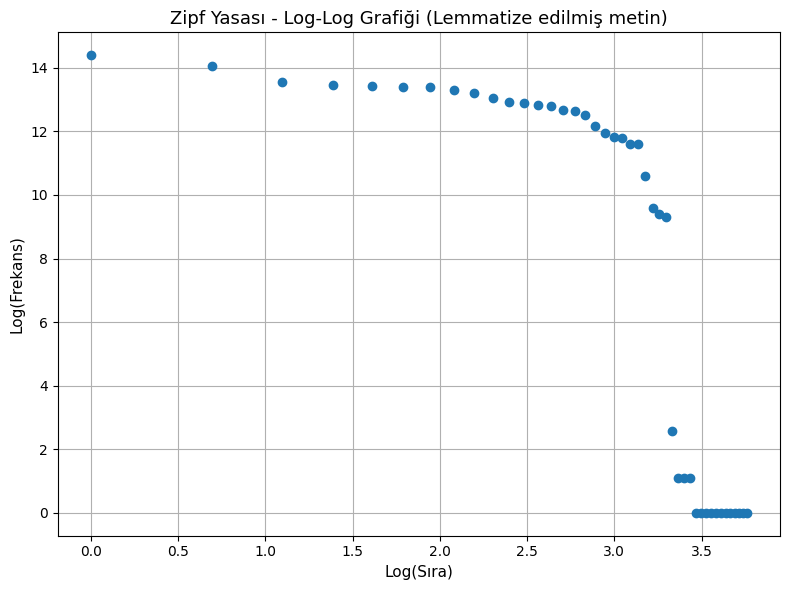

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# NaN olmayan satırları al
text_column = df['text_lemmatized_sentences'].dropna()

# Tüm kelimeleri tek listeye düzleştir
words = [token for sentence_list in text_column for sentence in sentence_list for token in sentence]

# Kelime frekanslarını say
word_counts = Counter(words)

# Azalan sıralama
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Kelimeleri ve frekansları ayır
words, freqs = zip(*sorted_word_counts)

# Log-log grafiği için frekansların ve sıraların log'u
log_freqs = np.log(freqs)
log_ranks = np.log(range(1, len(freqs) + 1))

# Grafik çizimi
plt.figure(figsize=(8, 6))
plt.plot(log_ranks, log_freqs, marker='o', linestyle='None')

# Grafik başlığı ve etiketler
plt.title("Zipf Yasası - Log-Log Grafiği (Lemmatize edilmiş metin)", fontsize=13)
plt.xlabel("Log(Sıra)", fontsize=11)
plt.ylabel("Log(Frekans)", fontsize=11)

plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
print(f"Veri çerçevesi boyutu: {df.shape}")  # (satır sayısı, sütun sayısı)

Veri çerçevesi boyutu: (37637, 3)


In [6]:
initial_rows = len(df)
print(f"Başlangıçtaki veri satırı: {initial_rows}")


Başlangıçtaki veri satırı: 37637


In [8]:
df_cleaned = df.dropna(subset=['text_lemmatized_sentences'])  # Boş satırları sil
final_rows = len(df_cleaned)
print(f"Temizlenmiş veri satırı: {final_rows}")

Temizlenmiş veri satırı: 37637


In [9]:
print(f"Elenen satır sayısı: {initial_rows - final_rows}")

Elenen satır sayısı: 0


In [12]:
words = [word for sentence_list in df_cleaned['text_lemmatized_sentences'] 
         for sentence in sentence_list for word in sentence]

print(f"Toplam kelime sayısı: {len(words)}")



Toplam kelime sayısı: 11502180


In [13]:
unique_words = set(words)
print(f"Eşsiz kelime sayısı: {len(unique_words)}")


Eşsiz kelime sayısı: 43
